In [1]:
!pip uninstall -y tqdm
!pip uninstall -y emd
!pip uninstall -y pycwt
!pip uninstall -y numpy
!pip uninstall -y scipy
!pip uninstall -y statsmodels

Found existing installation: tqdm 4.66.1
Uninstalling tqdm-4.66.1:
  Successfully uninstalled tqdm-4.66.1
Found existing installation: emd 0.6.2
Uninstalling emd-0.6.2:
  Successfully uninstalled emd-0.6.2
Found existing installation: pycwt 0.4.0b0
Uninstalling pycwt-0.4.0b0:
  Successfully uninstalled pycwt-0.4.0b0
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.12.0
Uninstalling scipy-1.12.0:
  Successfully uninstalled scipy-1.12.0
Found existing installation: statsmodels 0.14.1
Uninstalling statsmodels-0.14.1:
  Successfully uninstalled statsmodels-0.14.1


In [2]:
!pip install -q numpy
!pip install -q scipy
!pip install -q statsmodels

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sparse 0.14.0 requires scipy>=0.19, which is not installed.
seaborn 0.11.2 requires scipy>=1.0, which is not installed.
scikit-learn 1.0.2 requires scipy>=1.1.0, which is not installed.
scikit-image 0.19.2 requires scipy>=1.4.1, which is not installed.
gensim 4.1.2 requires scipy>=0.18.1, which is not installed.
emd-signal 1.5.1 requires scipy>=0.19, which is not installed.
emd-signal 1.5.1 requires tqdm==4.64.*, which is not installed.
dcor 0.6 requires scipy, which is not installed.
datashader 0.13.0 requires scipy, which is not installed.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
torchvision 0.13.1 requires torch==1.12.1, but you have torch 1.8.0 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.
ERROR: pip's dependency resolv

In [8]:
!pip install tqdm
!pip install pycwt

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\kirki\\anaconda3\\Lib\\site-packages\\~-mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\kirki\\anaconda3\\lib\\site-packages\\tqdm-4.66.1.dist-info\\METADATA'



ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\kirki\\anaconda3\\lib\\site-packages\\tqdm-4.66.1.dist-info\\METADATA'




  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)


In [11]:
!pip install tqdm==4.64
!pip install emd==0.6.2

  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1


ERROR: Cannot uninstall tqdm 4.66.1, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps tqdm==4.66.1'.


  Using cached emd-0.6.2-py2.py3-none-any.whl (83 kB)

In [12]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from statsmodels.tsa.stattools import adfuller
import emd
import pycwt as wavelet

In [13]:
mortal = pd.read_csv('mortal combat.csv', decimal=',', sep=';')

mortal['date'] = mortal['date'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))
mortal['Date'] = mortal['date'].dt.to_period('M')
mortal['Date'] = mortal['Date'].dt.to_timestamp()
mortal = mortal.drop('date', axis=1)
mortal = mortal.set_index('Date')

mortal.head()

,deaths
Date,
2023-04-01,192
2023-03-01,233
2023-02-01,213
2023-01-01,236
2022-12-01,226


p-value теста Дики-Фулера = 0.8774809437235819


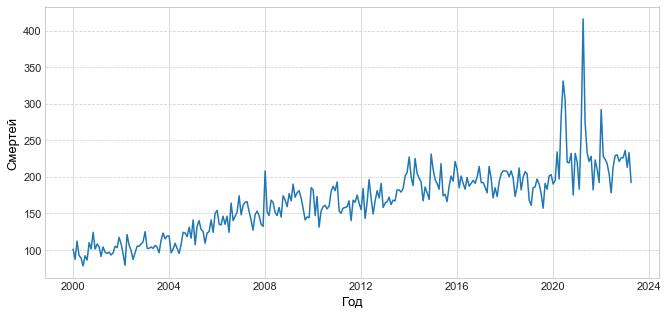

In [14]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize = [11, 5])

print(f'p-value теста Дики-Фулера = {adfuller(mortal)[1]}')

plt.plot(mortal, color='C0')

plt.xlabel('Год', fontsize = 13, color='black')
plt.ylabel('Смертей', fontsize = 13, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=11, color='black')
plt.tick_params(axis='y', labelsize=11)

<Axes: xlabel='Time (samples)'>

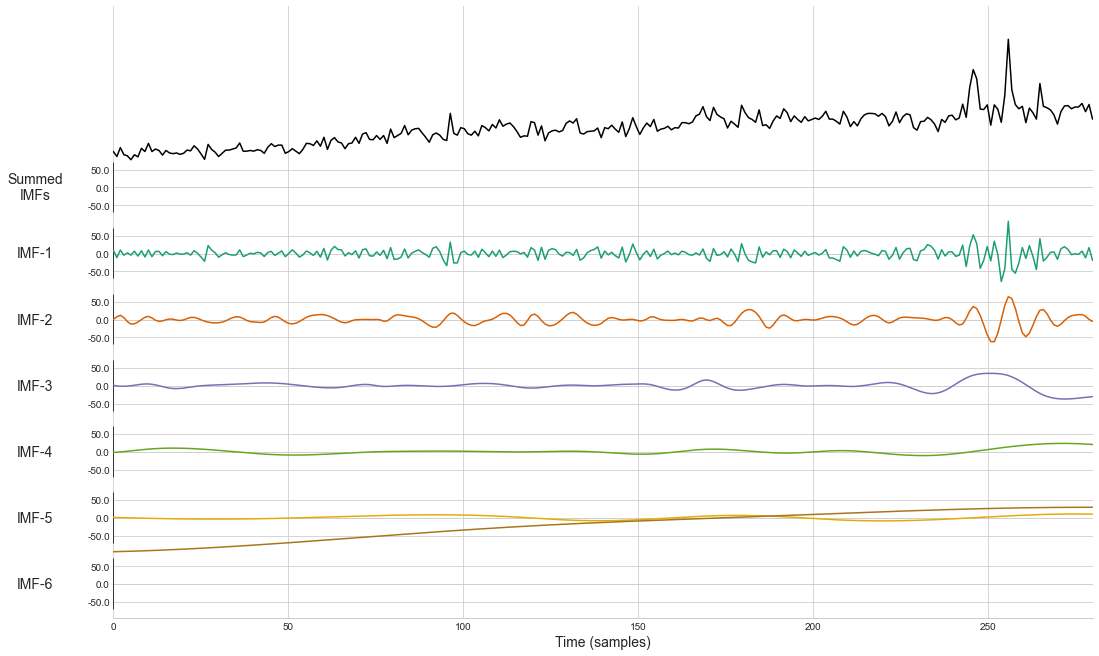

In [15]:
imf = emd.sift.sift(mortal.values[::-1])
emd.plotting.plot_imfs(imf)

p-value теста Дики-Фулера = 0.01935599070594992


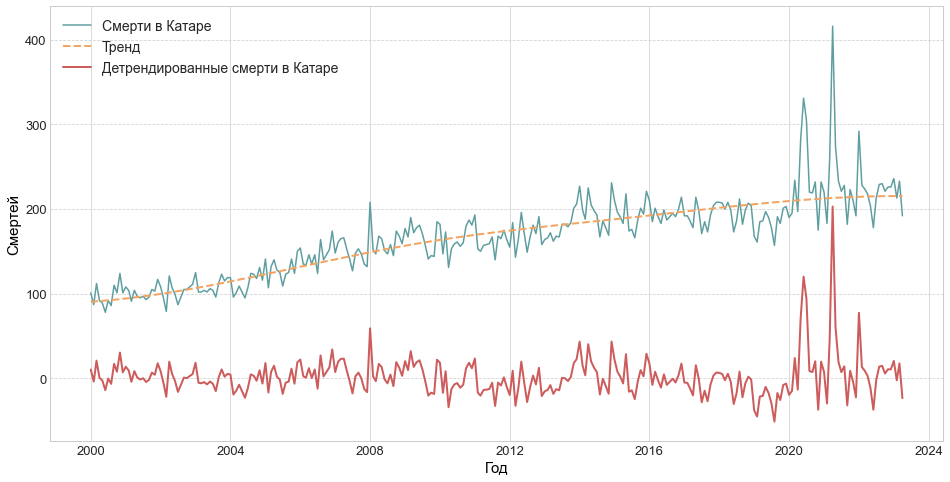

In [16]:
statmort = np.sum(imf[:,:-1], axis=1)
print(f'p-value теста Дики-Фулера = {adfuller(statmort)[1]}')

plt.figure(figsize = [16, 8])

plt.plot(mortal, color='cadetblue', label="Смерти в Катаре")
plt.plot(mortal.index[::-1], imf[:, -1], color='sandybrown', 
         linestyle='--', label='Тренд', linewidth=2)
plt.plot(mortal.index[::-1], statmort, color='indianred', 
         label='Детрендированные смерти в Катаре', linewidth=2)

plt.xlabel('Год', fontsize = 15, color='black')
plt.ylabel('Смертей', fontsize = 15, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.legend(fontsize=14)

In [17]:
title = 'Вейвлет спектр смертности в Катаре'
label = 'Смертность в Катаре'
units = 'Смертей'
t0 = 2000.
dt = 1 / 12

N = mortal.shape[0]
t = np.arange(0, N) * dt + t0

In [18]:
statmort = np.sum(imf[:,:-1], axis=1)
std = statmort.std()
var = std ** 2
statmort = statmort / std

In [19]:
mother = wavelet.Morlet(6) # меняем
s0 = 2 * dt # меняем
dj = 1 / 12 # меняем
J = 7 / dj  # меняем 
alpha, _, _ = wavelet.ar1(mortal.values[::-1])
alpha = alpha.item()

In [20]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(statmort, dt, dj, 
                                                      s0, J, mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std
#scales.shape

In [21]:
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs

power /= scales[:, None] # дополнительно

In [22]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha*0.69,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [23]:
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha*0.69,
                                        significance_level=0.95, dof=dof,
                                         wavelet=mother)

In [24]:
def plotyear(year):
    for i in range(12):
        bx.axvline(x = year + (i + 1) / 12, color = '1')

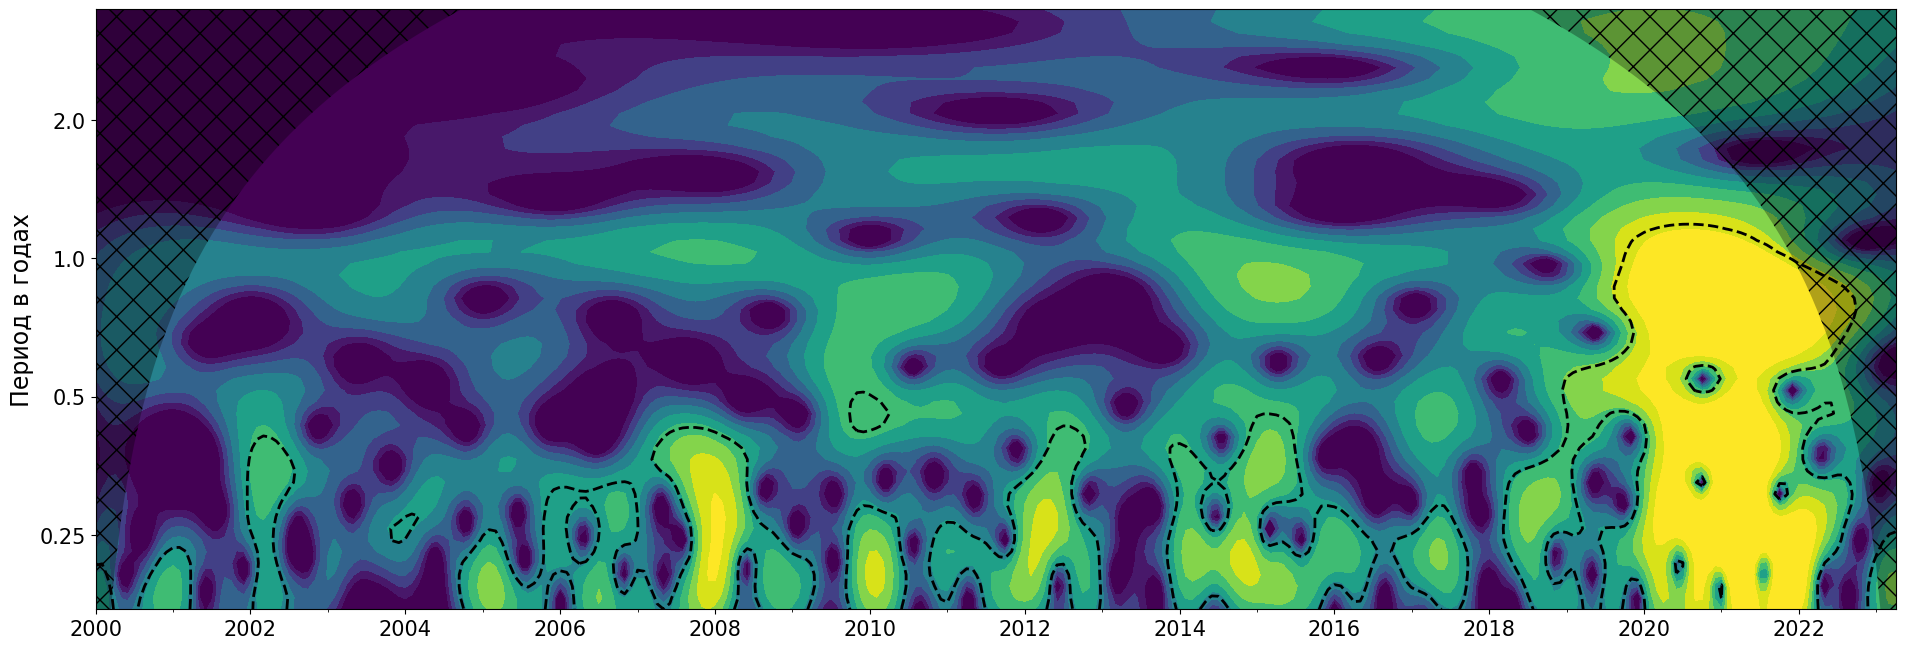

In [82]:
###### plt.style.use('default')
plt.figure(figsize = [18, 10])

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = plt.axes([1, 1, 1, 0.6])
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels)*0.75,
            extend='both', cmap=plt.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent, linestyles='dashed')
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
#bx.axvline(x = 2018, color = '1')
#plotyear(2012)
#bx.set_title(f'{label}, Вейвлет спектральная плотность ({mother.name})', fontsize=20)
bx.set_ylabel('Период в годах', fontsize=17)
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
Xticks = np.arange(2000, 2024, 2)

bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)
bx.set_xticks(Xticks)
bx.set_xticklabels(Xticks)
bx.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))

bx.set_ylim(bottom=np.log2(period.min()), top=1.8)
bx.set_xlim(2000, 2023.25)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

#plt.savefig('myImg.png', dpi=1500) 
plt.show()

# AAA

In [482]:
url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
dat = np.genfromtxt(url, skip_header=19)
title = 'NINO3 Sea Surface Temperature'
label = 'NINO3 SST'
units = 'degC'
t0 = 1871.0
dt = 0.25  # In years

In [483]:
N = dat.size
t = np.arange(0, N) * dt + t0

In [484]:
p = np.polyfit(t - t0, dat, 1)
dat_notrend = dat - np.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized data

In [485]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

In [486]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [487]:
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs

power /= scales[:, None]

In [488]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [489]:
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [490]:
from pycwt.helpers import find
sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * np.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

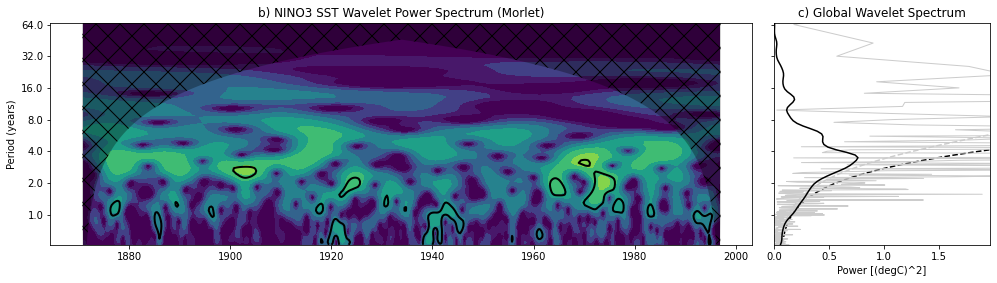

In [496]:
# Prepare the figure
plt.close('all')
plt.ioff()
figprops = dict(figsize=(15, 11), dpi=72)
fig = plt.figure(**figprops)



# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = plt.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = plt.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, np.log2(period), 'k--')
cx.plot(var * fft_theor, np.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, np.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, np.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(np.log2([period.min(), period.max()]))
cx.set_yticks(np.log2(Yticks))
cx.set_yticklabels(Yticks)
plt.setp(cx.get_yticklabels(), visible=False)

plt.show()